In [6]:
import numpy as np
import matplotlib.pyplot as plt
from hamming_distance_distribution import hamming_distance_distribution_CCR, hamming_distance_distribution

In [7]:
# --------- Parameters ---------
N_repeat = 100      # how many samples per neglection thresold

N = 5               # number of users
M = 4               # length of id-sequence for every user
K = 100              # number of antennas
xi = 0              # std of thermal noise

which_ctl_fct = 0   # 0: linear control function, 1: optimal control function
N_thres_CCR = 50        # how many different neglection thresolds between 0 and 1

nb_pts_gap = 20     # number of points for the gap computation
nb_pts_time = 30    # number of points for resolution of the time dependant Schrodinger's equation
epsilon = 0.1       # precision level for the control function (valid for both, linear and optimal scheduling)
gamma = 1           # strength of the transverse field, irrelevant for us 
neglection_thres = 10   # with a neglection thres > 1 effectively all matrix elements of J are set to zero

# runtime for these settings
T_hdd = 90       # in seconds

In [8]:
# ------------- Program ------------

# activity pattern
alpha = np.zeros(N)
alpha[0] = 0
alpha[1] = 1
alpha[2] = 0
alpha[3] = 0
alpha[4] = 1


# go through thresholds of CCR
thres_CCR = np.linspace(0, 1, N_thres_CCR)

d = np.arange(N)
n = np.zeros(shape=(N_thres_CCR, N+1))

for i in range(N_thres_CCR):
    n[i] = hamming_distance_distribution_CCR(N_repeat, N, M, alpha, K, xi, thres_CCR[i])[1]


0 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
1 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
2 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
3 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
4 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
5 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
6 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
7 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
8 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
9 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
10 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
11 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
12 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
13 alpha: [0 1 0 0 1]     CCR estimation: [1 1 1 1 1]   d_Hamming = 3
14 alpha: [0 1 0 0 1]     CCR 

In [9]:
# Quantum annealing result: Caution, this cell takes long to execute!
distr = hamming_distance_distribution(N_repeat, N, M, alpha, K, xi, 1, neglection_thres, gamma, epsilon, which_ctl_fct, nb_pts_gap, nb_pts_time)
n_QA = distr[1]
N_n = distr[2]
connected_counter = distr[3]

0 gs: 01000     gs1: 00000   d_Hamming = 1
1 gs: 01001     gs1: 11001   d_Hamming = 1
2 gs: 01001     gs1: 11001   d_Hamming = 1
3 gs: 01001     gs1: 01001   d_Hamming = 0
4 gs: 01001     gs1: 01000   d_Hamming = 1
5 gs: 01001     gs1: 00001   d_Hamming = 1
6 gs: 01001     gs1: 01001   d_Hamming = 0
7 gs: 01001     gs1: 01001   d_Hamming = 0
8 gs: 01001     gs1: 00001   d_Hamming = 1
9 gs: 00001     gs1: 00000   d_Hamming = 1
10 gs: 00001     gs1: 00001   d_Hamming = 0
11 gs: 01001     gs1: 01001   d_Hamming = 0
12 gs: 01001     gs1: 01001   d_Hamming = 0
13 gs: 01001     gs1: 01001   d_Hamming = 0
14 gs: 10001     gs1: 00001   d_Hamming = 1
15 gs: 01001     gs1: 01001   d_Hamming = 0
16 gs: 01001     gs1: 01101   d_Hamming = 1
17 gs: 01001     gs1: 01001   d_Hamming = 0
18 gs: 01001     gs1: 01000   d_Hamming = 1
19 gs: 01001     gs1: 00001   d_Hamming = 1
20 gs: 01000     gs1: 01000   d_Hamming = 0
21 gs: 01001     gs1: 00001   d_Hamming = 1
22 gs: 01001     gs1: 01001   d_Hamming = 

Quantum annealing:
avg. number of neglected matrix elements: 10.0
number of connected graphs: 0


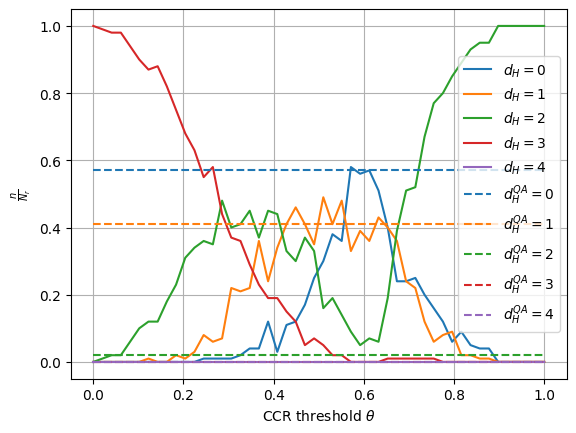

In [10]:
print("Quantum annealing:")
print(f"avg. number of neglected matrix elements: {N_n}")
print(f"number of connected graphs: {connected_counter}")

# -------- Plotting ----------

colors = ["tab:blue","tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]

for i in range(N):
    plt.plot(thres_CCR, n[:, i]/N_repeat, label=rf"$d_H={d[i]}$", color=colors[i])
for i in range(N):
    plt.plot([0, 1], np.array([n_QA[i], n_QA[i]])/N_repeat, label=rf"$d_H^{{QA}}={d[i]}$", color=colors[i], ls="dashed")
plt.xlabel(r"CCR threshold $\theta$")
plt.ylabel(r"$\frac{n}{N_r}$")
plt.legend()
plt.grid()
plt.show()